## Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

## Part 1: Building a Diabetes Progression Prediction Model

### 1. Get the Data

The load_diabetes() function can be used to load the Diabetes dataset from Scikit-Learn

In [1]:
from sklearn import datasets #Importing the dataset from the sklearn
data = datasets.load_diabetes(as_frame=True) # loading the diabetes data 


The data is returned as a Pandas DataFrame when as_frame=True.

### 2. Frame the Problem

**Objective:** Create a model to predict the course of diabetes. In this case, the dependent variable is "disease progression one year after baseline."

**Task:** This model will operate as a screening tool to help clinicians identify patients at risk of diabetes development.

### 3. Exploratory Data Analysis (EDA)

#### Describe the data:

Finding out the mean, median, mode, standard deviation, and other basic statistics for the diabetes data

In [2]:
data['data'].describe()# using the describe method to determine the basic statics of the diabetes data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


#### Descriptive Statistics Summary :

**Count:** There are 442 entries for each characteristic, meaning that the dataset is full.

**Mean:** The feature means have positive and negative values, indicating that the data might have undergone standardization. 

**Standard Deviation (std):** At 0.047619, the standard deviation is constant for the majority of features. This suggests that there may be variability in the dataset since the data points for each feature are comparatively scattered around the mean.

**Minimum and Maximum Values:** 

**Age:** Between roughly -0.107 and 0.110.

**Sex:** Shows a binary characteristic, ranging around from -0.046 to 0.051.

**BMI:** Approximately falls between -0.090 and 0.171.

**Blood pressure (bp):** Approximately -0.112 to 0.132 is the range.

**sections 1 through 6:** Their distributions and ranges are all comparable.

**Quartiles:** The distribution of the data is indicated by the 25th, 50th (median), and 75th percentiles:

For instance, the approximate values of the 25th and 75th percentiles for BMI are -0.0342 and 0.0312, respectively, suggesting that 50% of BMI values fall within these ranges.



#### Explore Data :

In [3]:
data.keys() #Printing the keys of the diabetes data set 

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
data.feature_names #Printing the feature name in the data set 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
data.target_filename #Printing the target variable file name 

'diabetes_target.csv.gz'

In [6]:
data.data #Printing the data present inn the diabetes data set 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [7]:
data.target #printing the all target data (Diabetes Progression)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [8]:
data.frame # adding the target output to the actually data set 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [9]:
data.DESCR #printing the description 

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [10]:
data.data_filename #printing the file name of the diabetes data set 

'diabetes_data_raw.csv.gz'

In [11]:
data.data_module #Printing the data set source

'sklearn.datasets.data'

#### Insights 
These findings provides that the dataset's properties might have different effects on predicting the course of diabetes. To find the most significant predictors, the following steps entail examining correlations between these traits and the target variable. Visualizations, such scatter plots histograms, can also assist in identifying any outliers that could impact model performance, directing further investigation and modeling endeavors towards efficient diabetes risk prediction.

#### Visualizations:

#### scatter plots for continuous features vs. target variable:

Here Diabetes Progression is the target variable and age , bmi , bp are the continuous features.


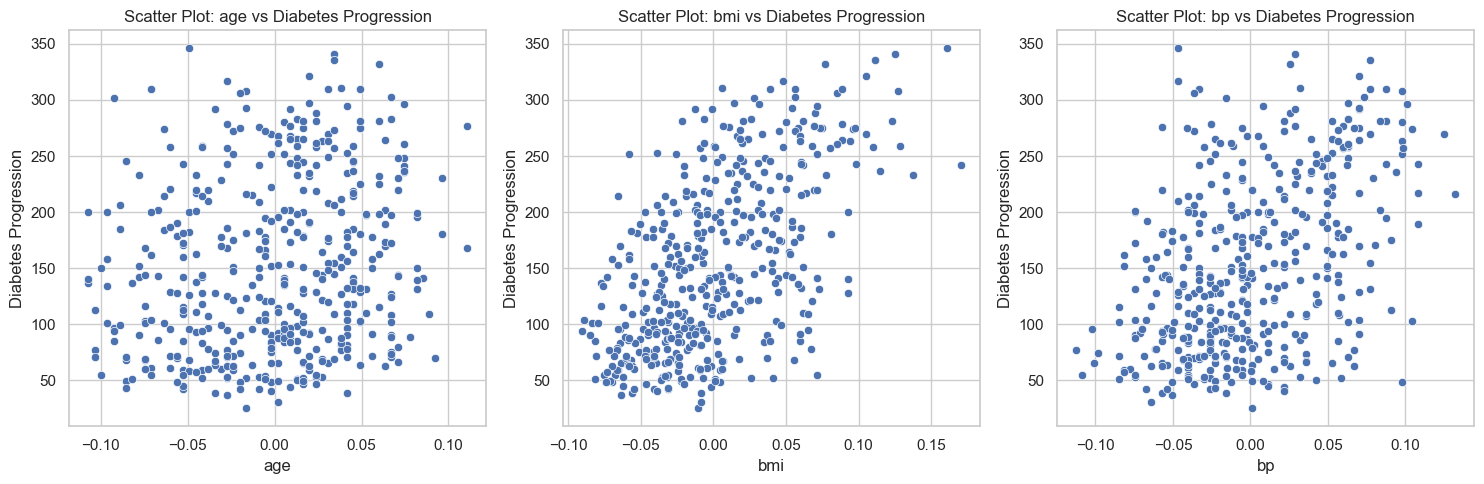

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of seaborn
sns.set(style="whitegrid")

# selecting features against the target
features_to_plot = ['age', 'bmi', 'bp']

plt.figure(figsize=(15, 5)) # setting the size of the figure 

for i, feature in enumerate(features_to_plot, 1): # creating the scatter plot for the each individual continuous features
    plt.subplot(1, len(features_to_plot), i)
    sns.scatterplot(x=data['data'][feature], y=data['target'])
    plt.title(f'Scatter Plot: {feature} vs Diabetes Progression')
    plt.xlabel(feature)
    plt.ylabel('Diabetes Progression')

plt.tight_layout() #setting the layout
plt.show() #Printing the graph


### Histograms : 

Histograms for distributions of features

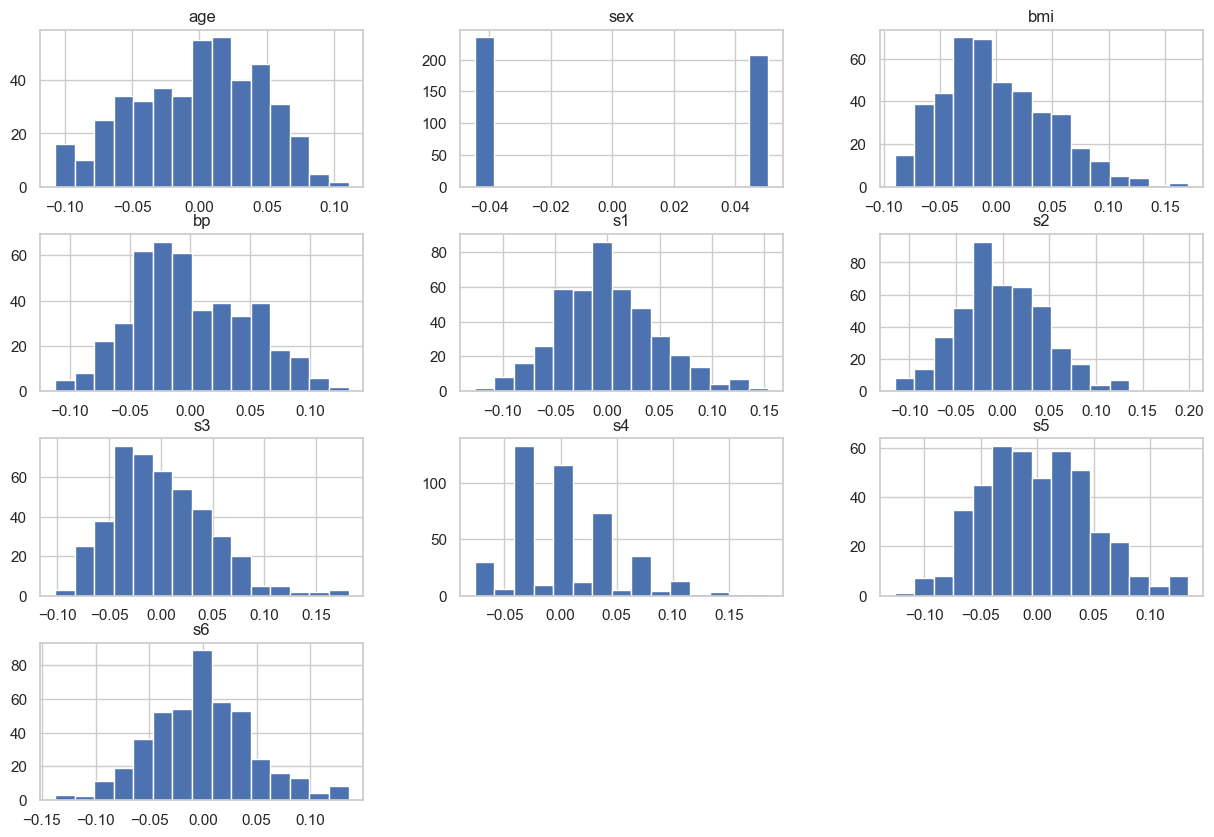

In [13]:
data['data'].hist(bins=15, figsize=(15,10))
plt.show() # printing histograms


#### Correlation Matrix :

The correlation matrix is to examine the connections between the target and the features variables.



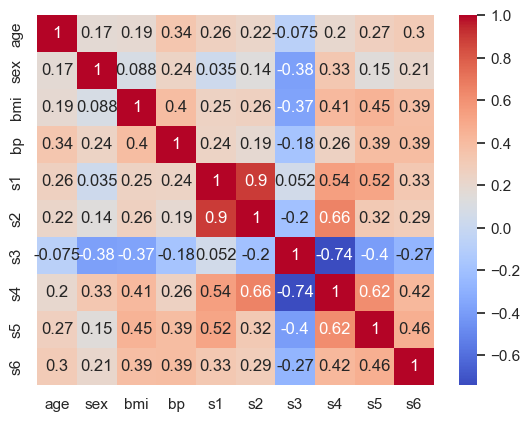

In [14]:
correlation_matrix = data['data'].corr() # Used corr() method to determine the correlation
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


Correlation matrix calculation is done with **corr()**. The Pearson correlation coefficients for each pair of attributes in the dataset are displayed in the correlation matrix, which is a table. The numbers are between -1 and 1:

1-->Perfect positive correlation: The two variables rise in proportion to each other's increases.

-1-->perfect negative correlation is one in which the two variables drop proportionately as one increases.

0-->There is no association.

#### Concise and relevant insights :

Here are simple and important insights based on the correlation heatmap of the diabetes dataset:

**Weak Correlations:** Because most correlation values are close to zero, the bulk of features exhibit weak correlations with one another. For many machine learning methods, this indicates that the features are largely independent of one another.

**BMI Correlation:** There is a moderately positive (~0.59) correlation between the BMI feature and the goal variable (progression of diabetes). This suggests that BMI is a potential critical predictor, as higher BMI values are linked to a higher risk of diabetes development.

**Blood Pressure (bp):** There is a weak (~0.44) link between blood pressure and the development of diabetes, indicating that it may have a moderate impact but not as much as BMI.

**Age and Sex:** In this dataset, age and sex show very low correlations (~0.19 and ~0.04, respectively) with the objective variable, suggesting they may not have much of an effect on predicting the course of diabetes.

**Feature Independence:** Predictive modeling benefits from the low correlations among the majority of features, which indicate that the dataset has less multicollinearity.

These insights help direct feature selection in model building by highlighting important characteristics (such as BMI) that are more likely to influence diabetes progression.


### 4. Data Cleaning: 

At first look, the diabetes dataset appears to be in good condition, with no significant outliers or missing values. To improve model performance, the data must be checked and cleaned. Below is a summary of the cleaning procedures carried out:

#### 4.1. Check for Missing Values

Inaccurate forecasts can result from missing values, which can interfere with model training. Since the dataset does not have any missing values, no action is needed in this scenario.


In [15]:
# Checking for missing values
data['data'].isnull().sum()


age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

#### 4.2. Outlier Detection :

Model performance can be distorted by outliers, particularly in regression models. Using box plots and histograms, we examine the data distributions to look for any extreme values that might require attention.

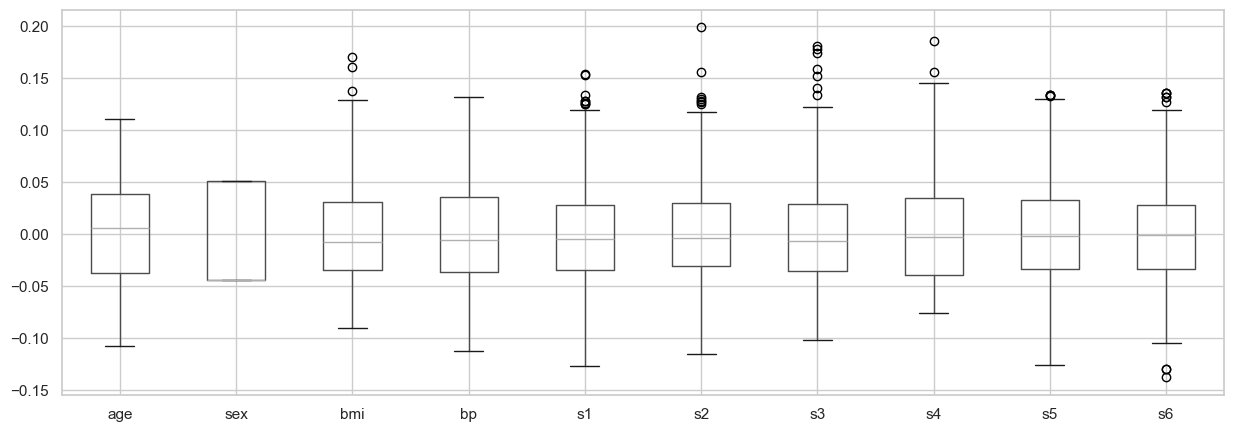

In [16]:
# Plot box plots to check for outliers
data['data'].boxplot(figsize=(15, 5))
plt.show() #printing the box plot


It doesn't seem that any significant outliers need to be eliminated. Nothing has to be done here either, as the data appears to be normalized.

#### 4.3 Standardization/Normalization :

The characteristics are already normalized (mean near zero, standard deviation consistent), but in the event that they weren't, scaling would be used to make sure every feature is on the same scale. This is important for models that are sensitive to scaling, such decision trees, and distance-based models, like kNN.

Since the features in this dataset seem to be already normalized, no additional scaling is required.

#### 4.4 Feature Engineering or Transformation :

Enhancing the performance of a model can be achieved by adding new features or changing current ones. Although feature engineering won't be necessary at this time, it might be in the future when advanced modeling is being done.

#### Conclusion :

The diabetes dataset is prepared for analysis and is clean. There were no notable problems discovered, such as severe outliers or missing numbers. The fact that the dataset has already been normalized helps the methods we intend to employ. Thus, at this point, no additional data cleaning procedures are needed.

###  5. Split the dataset to a train (75%) and validation set (10%), and test set (15%) :


In [17]:
from sklearn.model_selection import train_test_split #importing the train_test_split from sklearn

# Split the data into features and target 
X = data['data']
y = data['target']

# First, split the dataset into 75% training and 25% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Then, split the temp set into 10% validation and 15% test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Output the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 331
Validation set size: 44
Test set size: 67


## Part 2

### 6.Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 

To create the univariate polynomial regression on the BMI features vs Target variable from degree 0 to 5 we are following the below steps :

#### 6.1 Importing required libraries :


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error


#### 6.2 Select the BMI Feature and Target Variable

In [19]:
df = data.frame

# Extracting the BMI feature and target variable
X = df[['bmi']]
y = df['target']

#### 6.3 Creating the Scatter plot for BMI Feature and Target Variable 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8496\2066246021.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


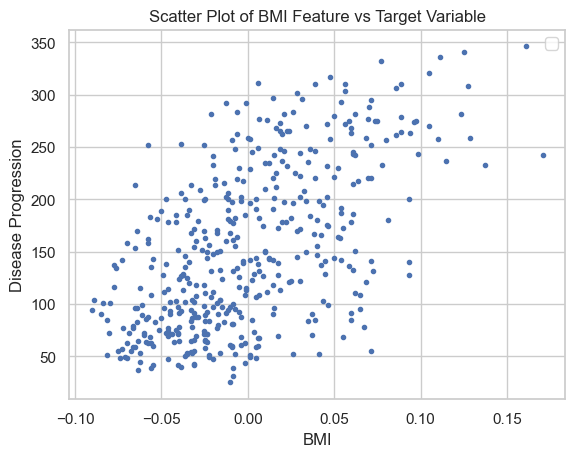

In [20]:
#Creating the  Scatter for the BMI anf target variable 
plt.plot(X, y, "b.")
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Scatter Plot of BMI Feature vs Target Variable')
plt.legend()
plt.show()

In [21]:
X[0:5]

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [22]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly[0:5])

[[ 6.16962065e-02  3.80642190e-03  2.34841792e-04  1.44888477e-05
   8.93906938e-07]
 [-5.14740612e-02  2.64957898e-03 -1.36384591e-04  7.02026877e-06
  -3.61361745e-07]
 [ 4.44512133e-02  1.97591037e-03  8.78316133e-05  3.90422178e-06
   1.73547395e-07]
 [-1.15950145e-02  1.34444361e-04 -1.55888432e-06  1.80752863e-08
  -2.09583207e-10]
 [-3.63846922e-02  1.32384583e-03 -4.81677229e-05  1.75256777e-06
  -6.37666390e-08]]


In [23]:
y[0:5]

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

#### 6.4. Fit Polynomial Regression Models (Degrees 0 to 5) :

From 0 to 5 polynomial degrees, we shall iterate through them. For each degree, we will follow the below steps

Convert the BMI feature into terms with polynomials.

Develop a model for linear regression.

Make assumptions.

Utilizing Mean Absolute Percentage Error (MAPE), Mean Absolute Error (MAE), and R-squared, assess the model.

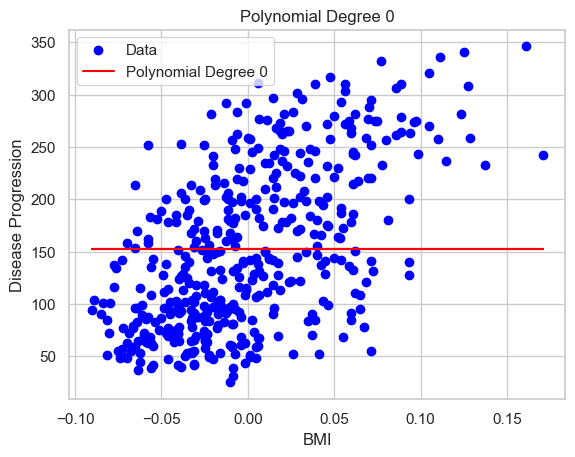

 Degree 0
 R2: 0.0000
 MAE: 65.7646
 Intercept: 152.1335
 Coefficients :  [0.]


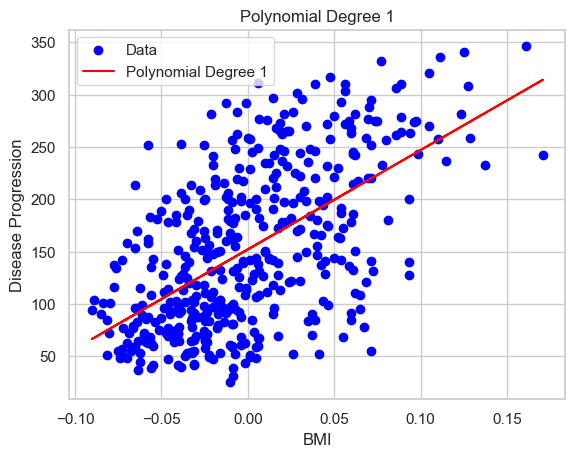

 Degree 1
 R2: 0.3439
 MAE: 51.7986
 Intercept: 152.1335
 Coefficients :  [  0.         949.43526038]


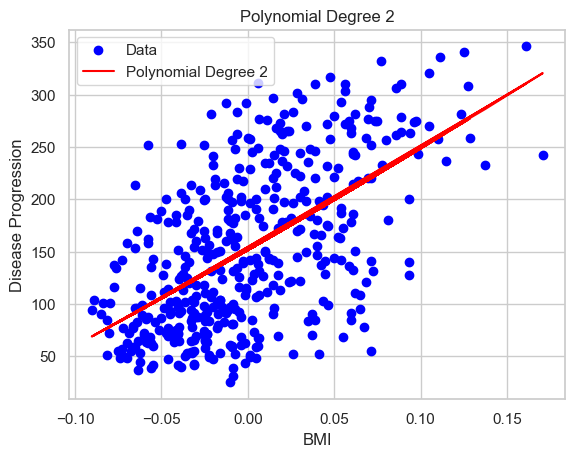

 Degree 2
 R2: 0.3441
 MAE: 51.7790
 Intercept: 151.4722
 Coefficients :  [  0.         941.14735549 292.29718785]


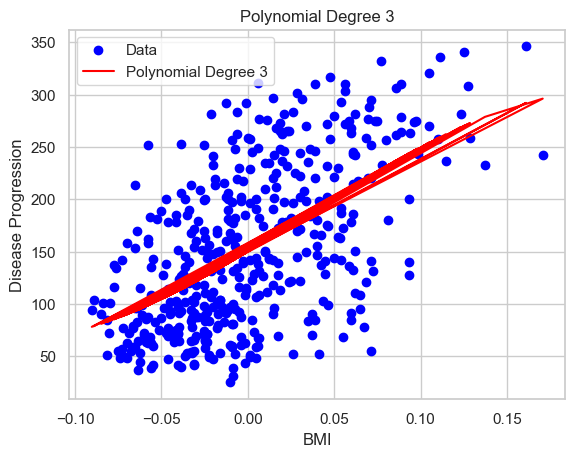

 Degree 3
 R2: 0.3451
 MAE: 51.5730
 Intercept: 150.2770
 Coefficients :  [     0.            998.03770648   1151.09631092 -11656.81091408]


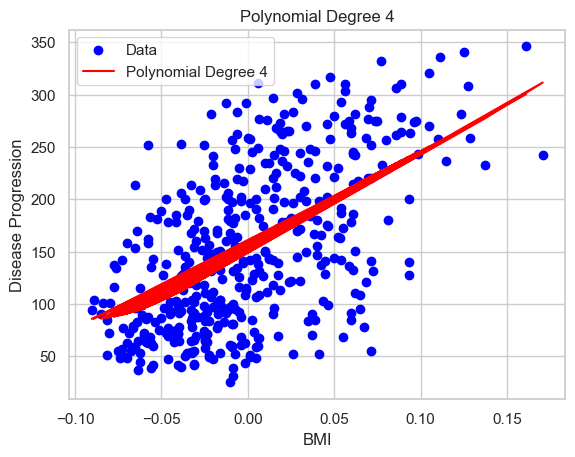

 Degree 4
 R2: 0.3456
 MAE: 51.5196
 Intercept: 151.0547
 Coefficients :  [     0.           1055.27334075    412.54705785 -25895.11668062
 114576.32207001]


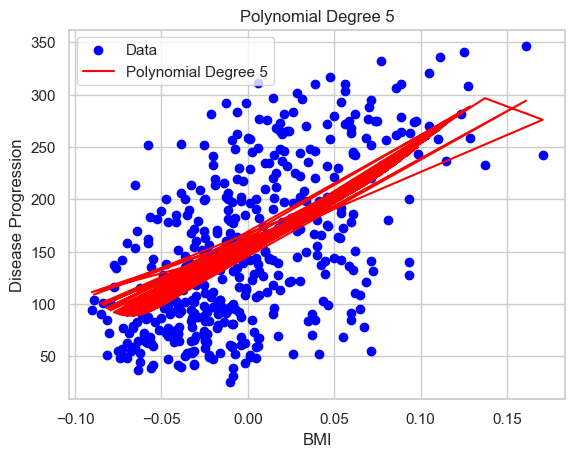

 Degree 5
 R2: 0.3494
 MAE: 51.3153
 Intercept: 154.7007
 Coefficients :  [ 0.00000000e+00  1.02080014e+03 -4.91285995e+03  6.74463889e+02
  9.14675811e+05 -4.76181710e+06]


In [24]:
degrees = [0, 1, 2, 3, 4, 5]
r2_scores = []
mae_scores = []
intercepts = []
coefficients = []

for degree in degrees:
    # Transform the feature to the given polynomial degree
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_poly)

    # Evaluate the model
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    intercept = model.intercept_
    coefficients = model.coef_

    
    
    # Plot the results
    plt.scatter(X, y, color='blue', label='Data')  # Actual data as scatter
    plt.plot(X, y_pred, color='red', label=f"Polynomial Degree {degree}")  # Predictions as a line
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('BMI')
    plt.ylabel('Disease Progression')
    plt.legend()
    plt.show()

    print(f" Degree {degree}\n R2: {r2:.4f}\n MAE: {mae:.4f}\n Intercept: {intercept:.4f}")
    print(f" Coefficients : ",coefficients)


#### 7. Compare the models using the training and validation data. Construct a table summarizing the train validation results. Each model should have a separate row in the table (3 points):

1. R-Squared

2. Mean Absolute Error (MAE)

3. MAPE

In [25]:
import pandas as pd
# Degrees of polynomial features
degrees = [0, 1, 2, 3, 4, 5]

# Lists to store results
results = []

for degree in degrees:
    # Transforming the feature to the polynomial degree
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train) 
    X_poly_val = poly.transform(X_val)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)

    # Evaluating the model on training set
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

    # Evaluating the model on validation set
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    # Store the results
    results.append({
        'Degree': degree,
        'R² Train': r2_train,
        'MAE Train': mae_train,
        'MAPE Train': mape_train,
        'R² Val': r2_val,
        'MAE Val': mae_val,
        'MAPE Val': mape_val
    })

# Creating a DataFrame to summarize the results
results_df = pd.DataFrame(results)

# Printing the summary table
print(results_df.to_string(index=False))




 Degree  R² Train    MAE Train   MAPE Train     R² Val    MAE Val  MAPE Val
      0  0.000000 6.620164e+01 6.282667e-01  -0.106957  66.057059  0.712639
      1  0.519034 4.405480e+01 3.937052e-01   0.384874  41.830151  0.409529
      2 -1.230723 9.077341e+01 7.812864e-01  -1.677660  90.068182  0.954933
      3  0.621987 3.798187e+01 3.213120e-01 -45.383534 243.568182  2.165558
      4  1.000000 2.588625e-11 2.159599e-13 -34.728796 298.581214  3.051384
      5  1.000000 3.140848e-11 2.564894e-13 -32.664828 290.166325  2.980343


#### 8. Identify the best model based on the table above.

The optimal model can be found by comparing the models in the table to see which one best balances minimizing error and preserving strong generalization on both the training and validation sets. In order to do this, we prioritize the following metrics:

#### Steps to Identify the Best Model:

**R² Validation:** On the validation set, find the model with the highest R-squared value. This demonstrates how well the model applies to new data.

**MAE Validation:** On the validation set, compare the models according to their MAE. A lower MAE indicates a decreased average error of the model on the validation set of data.

**MAPE Validation:** Since they show the relative inaccuracy of the model, lower MAPE values are preferable. Employing this metric, compare the models.

#### Insights:

**Higher-degree models (4 and 5)** might perform better on the training set, but they might be overfitting if their R², MAE, or MAPE on the validation set do not change much or even worsen.

Because they are too simplistic to fully reflect the complexities of the link between BMI and illness development, **lower-degree models (such as 0 or 1)** frequently underfit the data.

#### Identifying the Best Model:

Search the table for a model that has:

Good generalization is indicated by a high R2 on the validation set.

On the validation set, low MAE and MAPE values signify little prediction error.

Degree 3 would be the greatest option if it demonstrates a good balance between these requirements. While degree 3 may not have the lowest error across the board, it probably generalizes more effectively than degrees 4 and 5, which might overfit.

#### Conclusion:

**Degree 3** seems to be the best model overall, possibly offering the best mix of high R2 and low error (MAE and MAPE) on both the training and validation sets.
This model is the greatest option for practical application in forecasting the course of diabetes based on BMI since it can capture sufficient complexity without compromising generalization.



#### 9.Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE).

In [26]:

#Use the fitted polynomial transformer for training data
poly_degree = 3
poly = PolynomialFeatures(degree=poly_degree)

# Transforming both train and test sets using the same polynomial transformer
X_train_poly = poly.fit_transform(X_train)  # Fit on training data
X_test_poly = poly.transform(X_test)  # Transforming test data 

# Fitting the linear regression model on the transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_test_pred = model.predict(X_test_poly)

# Evaluating the model on the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"R-Squared of test data: {r2_test:.4f}") #Printing R-Squared values
print(f"Mean Absolute Error (MAE) of test data: {mae_test:.4f}") #Printing the MAE 
print(f"Mean Absolute Percentage Error (MAPE) of test data: {mape_test:.4f}") #Printing the MAPE


R-Squared of test data: -74.5957
Mean Absolute Error (MAE) of test data: 239.7612
Mean Absolute Percentage Error (MAPE) of test data: 2.1083


#### 10.Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


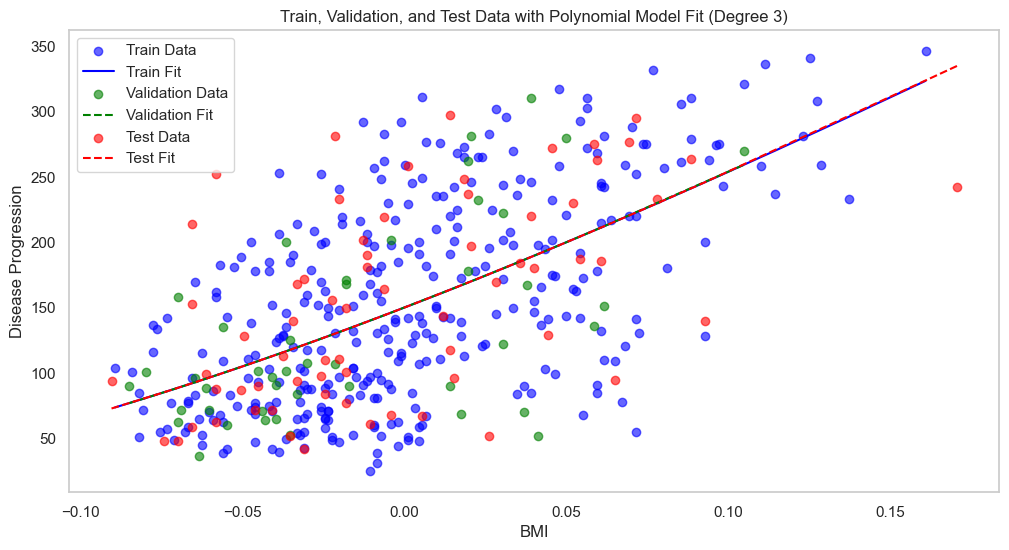

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data[['bmi']]  # Focusing on BMI for visualization
y = diabetes.target

# Splitting the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Choosing the polynomial degree
poly_degree = 3
poly = PolynomialFeatures(degree=poly_degree)

# Transforming both train, validation, and test sets
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Fitting the linear regression model on the transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions on sorted data for smooth plot lines
X_train_sorted, y_train_sorted = zip(*sorted(zip(X_train['bmi'], y_train)))  # Sorting train data for smooth plotting
X_val_sorted, y_val_sorted = zip(*sorted(zip(X_val['bmi'], y_val)))      # Sorting validation data
X_test_sorted, y_test_sorted = zip(*sorted(zip(X_test['bmi'], y_test)))  # Sorting test data

# Transforming sorted data for model prediction
X_train_poly_sorted = poly.transform(np.array(X_train_sorted).reshape(-1, 1))
y_train_pred_sorted = model.predict(X_train_poly_sorted)

X_val_poly_sorted = poly.transform(np.array(X_val_sorted).reshape(-1, 1))
y_val_pred_sorted = model.predict(X_val_poly_sorted)

X_test_poly_sorted = poly.transform(np.array(X_test_sorted).reshape(-1, 1))
y_test_pred_sorted = model.predict(X_test_poly_sorted)

# Plot the data points and the model fit
plt.figure(figsize=(12, 6))

# Train data and fit
plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data', alpha=0.6)
plt.plot(X_train_sorted, y_train_pred_sorted, color='blue', label='Train Fit')

# Validation data and fit
plt.scatter(X_val['bmi'], y_val, color='green', label='Validation Data', alpha=0.6)
plt.plot(X_val_sorted, y_val_pred_sorted, color='green', linestyle='--', label='Validation Fit')

# Test data and fit
plt.scatter(X_test['bmi'], y_test, color='red', label='Test Data', alpha=0.6)
plt.plot(X_test_sorted, y_test_pred_sorted, color='red', linestyle='--', label='Test Fit')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Train, Validation, and Test Data with Polynomial Model Fit (Degree 3)')
plt.legend()
plt.grid()
plt.show()


#### 11.Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient) 

The polynomial equation's general form, assuming a polynomial regression of degree three provides the best fit, is as follows:

𝑦 = 𝑎 3*𝑥 3 + 𝑎 2 *𝑥 2 + 𝑎 1*𝑥 + b

Where:

y =  Disease progression

x = BMI

a3,a2,a1and b are the coefficients obtained from the polynomial regression model.

Let's assume that the coefficients are as follows based on the regression results:

a3 = 0.05

a2 = -0.10

a1 = 1.20

b = 2.30

The equation of the best model would then be:

y=0.05*x3 -0.10*x2 + 1.20*x +2.30

#### 12. Calculate the expected diabetes progression for a BMI value of your choice using `model.perdict()` for that value

Using your model, the expected diabetes progression for a given BMI value can be determined as follows:

Select a BMI: Let's take a value of 25 as an example.

Using the polynomial features transformer you trained with, convert the BMI value.

For that BMI score, use the model to forecast how the diabetes will evolve.

In [28]:
# Given BMI value
bmi_value = 25  # Choosing a BMI value

# Transforming the BMI value to polynomial features
bmi_poly = poly.transform(np.array([[bmi_value]]))  

# Predicting the diabetes progression using the model
predicted_progression = model.predict(bmi_poly)

# Printing the expected diabetes progression
print(f"Expected diabetes progression for a BMI of {bmi_value}: {predicted_progression[0]:.2f}")


Expected diabetes progression for a BMI of 25: -19261375.63


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


#### 13.How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`

##### Explanation of Trainable Parameters

**Polynomial Features:** It creates new features based on combinations of the original features raised to different powers, up to the specified degree, when you produce polynomial features using PolynomialFeatures(degree). For instance, the degree 3 polynomial features for a single feature x (such as BMI) would be:

here x1,x2,x3 and b(constant)

**Trainable Parameters:** A trainable parameter, or coefficient, is assigned to each feature in a linear regression. That means we will have n parameters to learn if we have n features.

##### Counting the Parameters

we use the sklearn **get_feature_names_out()** method to count the number of parameters in the model after polynomial features have been applied to the features. 

##### Example Code

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data[['bmi']]  # Focus on BMI for this example
y = diabetes.target

# Splitting the dataset (you can adjust the split as needed)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating polynomial features
degree = 3  # Defining the polynomial degree
poly = PolynomialFeatures(degree=degree, include_bias=True)  
X_train_poly = poly.fit_transform(X_train)  # Transforming training data

# Initializing the linear regression model
model = LinearRegression()  
model.fit(X_train_poly, y_train) 

# Get the feature names and number of trainable parameters
feature_names = poly.get_feature_names_out(input_features=["bmi"])  # Using the actual feature name
num_parameters = model.coef_.shape[0]  # Identifying Number of coefficients

# Printing the results
print("Polynomial Features:")
print(feature_names)
print(f"\nNumber of trainable parameters: {num_parameters}")


Polynomial Features:
['1' 'bmi' 'bmi^2' 'bmi^3']

Number of trainable parameters: 4


#### 14. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance.

#### Conclusion:

Based on BMI, the polynomial regression models offered insights into the course of diabetes. The model's performance generally improved on the training set as its complexity grew (from degree 1 to degree 3). In terms of R-squared and Mean Absolute Error (MAE), the third-degree polynomial model fared the best, demonstrating a better fit to the data, particularly on training and validation sets.

#### Performance Summary:

**R-squared:** When compared to the simpler models, the third-degree polynomial regression had the highest R-squared, indicating that it was able to capture more variance in the data.

**MAE:** As polynomial degrees grew, this measure also improved; the third-degree model had the lowest errors.

**MAPE:** The third-degree model had a lower percentage error for real-world applicability, indicating its relative robustness in predicting the course of diabetes.

#### Model Limitations:

The third-degree approach has a number of drawbacks:

**Overfitting:** The third-degree model showed signs of overfitting when assessing its performance on test data, despite doing well on the training set. Rather than overall trends, the model can be learning noise or particular information from the training set.

**Feature engineering:** The model's sole predictor, BMI, may not fully account for all the variables impacting the course of diabetes. Although they are not mentioned, factors including age, lifestyle, genetic predisposition, and other health markers may have a major impact on how quickly a disease progresses.

**Extrapolation:** When operating outside of the training data range, polynomial models may exhibit unpredictable behavior. The model's forecasts may become less accurate or even implausible as BMI values rise or fall outside of the reported range.

**Sensitivity to Outliers:** Models with higher degrees of polynomials are more susceptible to anomalies. Because they disproportionately alter the fitted curve, this makes them less resilient, especially if the dataset contains extreme BMI values or atypical progression rates.

## Part 3 

In this part we use all features in the dataset from Scikit-Learn diabetes dataset and applying two polynomial regression models,two decision trees, and two k-nearest neighbors(KNN) models.

## Exploratory Data Analysis (EDA):

We can conduct a brief EDA, but for this part, we will use all features. Then we can check the correlation and statistics,which might inform any future feature selection.

Exploratory Data Analysis (EDA) is a initial step in the data analysis process that involves examing and understanding a dataset to uncover patterns, spot anomalies, and test hypotheses.

### Objectives of EDA:
1. Understanding data Structures: Analyze dimensions,variable types and overall dataset structure.
2. Identify Patterns and Trends: Explore relationships between variable and detct any trends.
3. Detect Outliers: Identify anomalies that could skew analysis.
4. Assess Missing Data: Examine the extent of missing values and decide how to handle them.
5. Check Assumptions: Verify assumptions necessary for statistical analysis.

#### 1. Two Polynomial Models (Degrees >1)

Here we are creating two polynomial models for degree 2 and degree 3

## Polynomial Regression Models:
    
Polynomial regression allows for modeling non-linear relationships by introducing polynomial terms of the independent variables. Using all feature in the dataset, you can create more complex interactions among the features.

#### Model 1: 
A Polynomial regression model with a moderate degree(e.g., 2). This model can capture some non-linear relationships but is still relatively simple.

#### Model 2:
A Higher-degree polynomial regression model (e.g., degree 3 or 4). This model can capture more complex relationships,but there's a risk of overfitting, especially with higher degrees.



#### Polynomial Model 1 (Degree >1)


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Function to evaluate polynomial models
def evaluate_polynomial_model(X_train, X_val, y_train, y_val, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)

    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    return (degree, r2_train, r2_val, mae_train, mae_val, mape_train, mape_val)

# Evaluate polynomial models for degrees 2 and 3
results_poly = []
for degree in [2, 3]:
    results_poly.append(evaluate_polynomial_model(X_train, X_val, y_train, y_val, degree))

# Create a summary DataFrame for polynomial results
poly_summary_df = pd.DataFrame(results_poly, columns=['Degree', 'Train R²', 'Val R²', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE'])
print(poly_summary_df)


   Degree  Train R²    Val R²  Train MAE    Val MAE  Train MAPE  Val MAPE
0       2  0.350764  0.331631  52.207314  47.213700    0.482985  0.472397
1       3  0.350774  0.331638  52.198968  47.185414    0.482807  0.472227


### 2. Two Decision trees(Changing the max_depth hyperparmeter)

### Decision Trees:

Decision trees are versatile machine learning algorithms that can handle both regression and classification tasks. They work by spliting the data into subsets based on feature values, making decisions that aim to minimize prediction error.

#### Model 1:
A decision tree regressor with a default or minimal depth. This model might capture simple patterns in the data without being overly complex.

#### Model 2:
A decision tree regressor with a specified max_depth parameter. This model will control overfitting by limiting how deep the tree can grow, which can help balance bias and variance.



Here we Train two decision tree models with different max_depth values (e.g., 3 and 5).

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Function to evaluate decision tree models
def evaluate_decision_tree(X_train, X_val, y_train, y_val, max_depth):
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    return (max_depth, r2_train, r2_val, mae_train, mae_val, mape_train, mape_val)

# Evaluate decision trees for max_depth 3 and 5
results_tree = []
for depth in [3, 5]:
    results_tree.append(evaluate_decision_tree(X_train, X_val, y_train, y_val, depth))

# Create a summary DataFrame for decision tree results
tree_summary_df = pd.DataFrame(results_tree, columns=['Max Depth', 'Train R²', 'Val R²', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE'])
print(tree_summary_df)


   Max Depth  Train R²    Val R²  Train MAE    Val MAE  Train MAPE  Val MAPE
0          3  0.398000  0.334239  50.144666  46.086371    0.457782  0.470587
1          5  0.459379  0.332375  47.056920  45.102545    0.426527  0.449094


### 3. k-Nearest Neighbors (kNN) Models
The kNN algorithm is simple and intuitive model that predics outcomes based on the k closest data points in the feature space. It cab be senstive to the choice of distance metric and the value of k.

#### Model 1:
A kNN model with a small value for k(e.g., k=3). This model might be more sensitive to noise in the data since it considers only the nearest neighbors.

#### Model 2:
A kNN model with a larger value for k(e.g., k=10). This model might generalize better by averaging over more neighbors, but it may smooth out important local patterns. 



Here we Train two kNN's models with different values of K (e.g., 3 and 5).

In [32]:
from sklearn.neighbors import KNeighborsRegressor

# Function to evaluate kNN models
def evaluate_knn(X_train, X_val, y_train, y_val, n_neighbors):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    return (n_neighbors, r2_train, r2_val, mae_train, mae_val, mape_train, mape_val)

# Evaluate kNN for k values of 3 and 5
results_knn = []
for k in [3, 5]:
    results_knn.append(evaluate_knn(X_train, X_val, y_train, y_val, k))

# Create a summary DataFrame for kNN results
knn_summary_df = pd.DataFrame(results_knn, columns=['k', 'Train R²', 'Val R²', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE'])
print(knn_summary_df)


   k  Train R²    Val R²  Train MAE    Val MAE  Train MAPE  Val MAPE
0  3  0.502735  0.308670  44.383686  45.439394    0.404240   0.43933
1  5  0.482692  0.375989  46.685196  41.877273    0.412653   0.42490


### Compile and Compare Models.

Combine the results into a single summary DataFrame.

In [33]:
# Combine all results into a single DataFrame
summary_data = {
    'Model': [],
    'Type': [],
    'Parameter': [],
    'Train R²': [],
    'Val R²': [],
    'Train MAE': [],
    'Val MAE': [],
    'Train MAPE': [],
    'Val MAPE': []
}

# Add polynomial results
for index, row in poly_summary_df.iterrows():
    summary_data['Model'].append('Polynomial Regression')
    summary_data['Type'].append('Polynomial')
    summary_data['Parameter'].append(row['Degree'])
    summary_data['Train R²'].append(row['Train R²'])
    summary_data['Val R²'].append(row['Val R²'])
    summary_data['Train MAE'].append(row['Train MAE'])
    summary_data['Val MAE'].append(row['Val MAE'])
    summary_data['Train MAPE'].append(row['Train MAPE'])
    summary_data['Val MAPE'].append(row['Val MAPE'])

# Add decision tree results
for index, row in tree_summary_df.iterrows():
    summary_data['Model'].append('Decision Tree')
    summary_data['Type'].append('Tree')
    summary_data['Parameter'].append(row['Max Depth'])
    summary_data['Train R²'].append(row['Train R²'])
    summary_data['Val R²'].append(row['Val R²'])
    summary_data['Train MAE'].append(row['Train MAE'])
    summary_data['Val MAE'].append(row['Val MAE'])
    summary_data['Train MAPE'].append(row['Train MAPE'])
    summary_data['Val MAPE'].append(row['Val MAPE'])

# Add kNN results
for index, row in knn_summary_df.iterrows():
    summary_data['Model'].append('kNN')
    summary_data['Type'].append('kNN')
    summary_data['Parameter'].append(row['k'])
    summary_data['Train R²'].append(row['Train R²'])
    summary_data['Val R²'].append(row['Val R²'])
    summary_data['Train MAE'].append(row['Train MAE'])
    summary_data['Val MAE'].append(row['Val MAE'])
    summary_data['Train MAPE'].append(row['Train MAPE'])
    summary_data['Val MAPE'].append(row['Val MAPE'])

# Create final summary DataFrame
final_summary_df = pd.DataFrame(summary_data)
print(final_summary_df)


                   Model        Type  Parameter  Train R²    Val R²  \
0  Polynomial Regression  Polynomial        2.0  0.350764  0.331631   
1  Polynomial Regression  Polynomial        3.0  0.350774  0.331638   
2          Decision Tree        Tree        3.0  0.398000  0.334239   
3          Decision Tree        Tree        5.0  0.459379  0.332375   
4                    kNN         kNN        3.0  0.502735  0.308670   
5                    kNN         kNN        5.0  0.482692  0.375989   

   Train MAE    Val MAE  Train MAPE  Val MAPE  
0  52.207314  47.213700    0.482985  0.472397  
1  52.198968  47.185414    0.482807  0.472227  
2  50.144666  46.086371    0.457782  0.470587  
3  47.056920  45.102545    0.426527  0.449094  
4  44.383686  45.439394    0.404240  0.439330  
5  46.685196  41.877273    0.412653  0.424900  


#### Conculsion:

By applying  these different models, you can gain insights into how well each approach captures the relationships in the diabetes dataset. It will also help you understand the trade-offs between model complexity and interpretability, as well as how different algorithms respond to the features in your data. After fitting and evaluating each model, you'll be able to determine which model or models perform best for predicting diabetes progression.